In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leer el csv y mostrarlo, cambiar las columnas a lower
df = pd.read_csv('Online_Retail.csv', encoding = "ISO-8859-1")
df.columns = df.columns.str.lower()
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2020 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2020 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2020 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2020 12:50,4.15,12680.0,France


In [3]:
# Observar información del dataset
display(df.info()) #Descripción y cust_iD presentan valores nulos, mayoritariamente en Customer_ID
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   region        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

,quantity,unit_price,customer_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
# Eliminar duplicados
display(df.duplicated().sum())
df.drop_duplicates(inplace=True)

5268

## OBSERVAR SI SE PUEDE RESCATAR ALGÚN CUSTOMER_ID

In [5]:
df[df['customer_id'].isna()].sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
26795,538524,20718,RED RETROSPOT SHOPPER BAG,2,13/12/2019 09:35,2.51,NaN,United Kingdom
509560,579352,72741,GRAND CHOCOLATECANDLE,9,29/11/2020 11:48,1.45,NaN,United Kingdom
253468,559163,21802,CHRISTMAS TREE HEART DECORATION,3,06/07/2020 16:33,0.42,NaN,United Kingdom
537060,581238,20963,APPLE BATH SPONGE,1,08/12/2020 10:53,2.46,NaN,United Kingdom
162428,550500,21166,COOK WITH WINE METAL SIGN,1,18/04/2020 15:26,4.13,NaN,United Kingdom
471399,576644,22844,VINTAGE CREAM DOG FOOD CONTAINER,1,16/11/2020 10:01,16.63,NaN,United Kingdom
138121,548191,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,29/03/2020 15:20,10.79,NaN,United Kingdom
18894,537823,22607,WOODEN ROUNDERS GARDEN SET,1,08/12/2019 14:25,16.98,NaN,United Kingdom
212759,555510,20675,BLUE POLKADOT BOWL,1,03/06/2020 17:09,2.46,NaN,United Kingdom
164361,550638,35911A,MULTICOLOUR RABBIT EGG WARMER,7,19/04/2020 15:44,0.83,NaN,United Kingdom


In [6]:
df[df['invoice_no']=='548516'].sample(30) #.sample(30)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
141657,548516,17012B,ORIGAMI JASMINE INCENSE/CANDLE SET,2,31/03/2020 16:28,2.46,NaN,United Kingdom
141660,548516,20725,LUNCH BAG RED RETROSPOT,1,31/03/2020 16:28,4.13,NaN,United Kingdom
141560,548516,22378,WALL TIDY RETROSPOT,1,31/03/2020 16:28,4.13,NaN,United Kingdom
141696,548516,82482,WOODEN PICTURE FRAME WHITE FINISH,25,31/03/2020 16:28,2.10,NaN,United Kingdom
141522,548516,21932,SCANDINAVIAN PAISLEY PICNIC BAG,1,31/03/2020 16:28,5.79,NaN,United Kingdom
141598,548516,22939,APRON APPLE DELIGHT,1,31/03/2020 16:28,4.96,NaN,United Kingdom
141637,548516,84991,60 TEATIME FAIRY CAKE CASES,5,31/03/2020 16:28,1.25,NaN,United Kingdom
141567,548516,22477,WATERING CAN GARDEN MARKER,1,31/03/2020 16:28,2.46,NaN,United Kingdom
141664,548516,20903,VINTAGE KEEPSAKE BOX TRAVELOGUE,1,31/03/2020 16:28,12.46,NaN,United Kingdom
141665,548516,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,1,31/03/2020 16:28,5.79,NaN,United Kingdom


In [7]:
df[df['stock_code']=='21556'].sample(30) #invoice_no 551547

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
256593,559499,21556,CERAMIC STRAWBERRY MONEY BOX,2,08/07/2020 14:22,4.13,NaN,United Kingdom
172574,551547,21556,CERAMIC STRAWBERRY MONEY BOX,4,03/05/2020 09:44,4.13,NaN,United Kingdom
297782,562955,21556,CERAMIC STRAWBERRY MONEY BOX,5,11/08/2020 10:14,4.13,NaN,United Kingdom
287065,562046,21556,CERAMIC STRAWBERRY MONEY BOX,6,02/08/2020 10:34,2.55,12378.0,Switzerland
301519,563328,21556,CERAMIC STRAWBERRY MONEY BOX,1,15/08/2020 13:07,2.55,14606.0,United Kingdom
119806,C546623,21556,CERAMIC STRAWBERRY MONEY BOX,-1,15/03/2020 11:36,2.55,17954.0,United Kingdom
244831,558556,21556,CERAMIC STRAWBERRY MONEY BOX,1,30/06/2020 13:14,2.55,17954.0,United Kingdom
223361,556482,21556,CERAMIC STRAWBERRY MONEY BOX,6,12/06/2020 13:04,2.55,17242.0,United Kingdom
179103,552262,21556,CERAMIC STRAWBERRY MONEY BOX,6,08/05/2020 11:37,2.55,14911.0,EIRE
66874,541827,21556,CERAMIC STRAWBERRY MONEY BOX,2,21/01/2020 17:05,2.46,NaN,United Kingdom


## NO LO PARECE ASÍ QUE DECIDO ELIMINAR LOS NULOS

In [8]:
# Eliminar asusentes
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    401604 non-null  object 
 1   stock_code    401604 non-null  object 
 2   description   401604 non-null  object 
 3   quantity      401604 non-null  int64  
 4   invoice_date  401604 non-null  object 
 5   unit_price    401604 non-null  float64
 6   customer_id   401604 non-null  float64
 7   region        401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.5+ MB


In [9]:
# Cambiar a tipo datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['customer_id'] = df['customer_id'].astype('int')

In [10]:
#df = df.drop( df[df['unit_price'] <= 0].index )
#df[df['unit_price'] <= 0]#22841 22580	
#df[df['stock_code'] == '22580'][['unit_price', 'region']].value_counts()

## <a style="color:#FF5522">INICIO EDA</a>

In [11]:
# Crear columna con el precio total de la venta
df['total_sale']=df['unit_price']*df['quantity']
# Crear columna con el mes
df['month']=df['invoice_date'].dt.month

In [12]:
df.nunique()

invoice_no      22190
stock_code       3684
description      3887
quantity          436
invoice_date    20460
unit_price        620
customer_id      4372
region             37
total_sale       4041
month              12
dtype: int64

In [13]:
df.describe()

,quantity,unit_price,customer_id,total_sale,month
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638,6.941350
std,250.283037,69.764035,1714.006089,430.352218,3.328531
min,-80995.000000,0.000000,12346.000000,-168469.600000,1.000000
25%,2.000000,1.250000,13939.000000,4.250000,4.000000
50%,5.000000,1.950000,15145.000000,11.700000,7.000000
75%,12.000000,3.750000,16784.000000,19.800000,10.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000


Dado que ya se puede observar en la parte de arriba la descripción, considero que las siguientes boxplots quedan algo redundantes, pero se pueden usar para observar gráficamente las distribuciones de los valores en `quantity` y `total_sale`

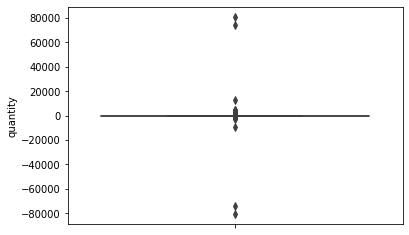

In [14]:
# Distribución de cantidades (quantity)
sns.boxplot(data=df, y='quantity') #df[(df['quantity']>-40) & (df['quantity']<40)]
plt.show()

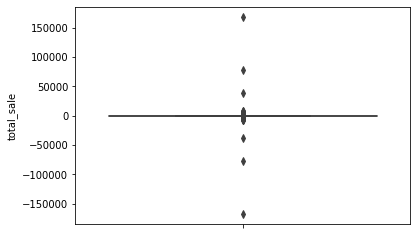

In [15]:
# Distribución de ventas totales (total_sale)
sns.boxplot(data=df, y='total_sale')
plt.show()

### AGRUPACIÓN POR USUARIO
Aquí realizo una agrupación por usuario para poder entender un poco sobre el gasto y la cantidad de productos que suele generar un solo usuario.

Se observa que las ventas tienen mayor valor en general y solo existe un valor demasiado alejado en cuanto a la cantidad de productos por usuario.

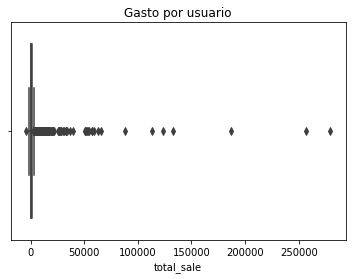

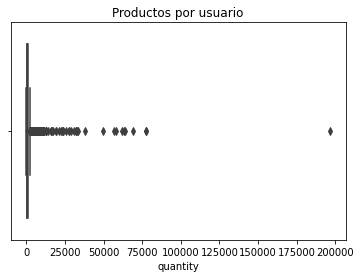

In [16]:
# Gasto y productos por usuario
gp_1 = df.groupby('customer_id').agg({'total_sale':'sum', 'quantity':'sum'})
sns.boxplot(data=gp_1, x='total_sale')
plt.title('Gasto por usuario')
plt.show()

sns.boxplot(data=gp_1, x='quantity')
plt.title('Productos por usuario')
plt.show()

#### OBSERVAR VALORES NEGATIVOS
En este caso, los valores negativos pueden representar personas que cancelaron pedidos que se hicieron antes de la fecha de registro. Y la gran cantidad de valores en 0, indica que son usuarios que realizaron y cancelaron todos sus pedidos. Igual que se observa en las boxplots anteriores no son muchas personas que han cancelado sus pedidos y son pedidos con menos de 300 productos y menos de $5000 en gastos.

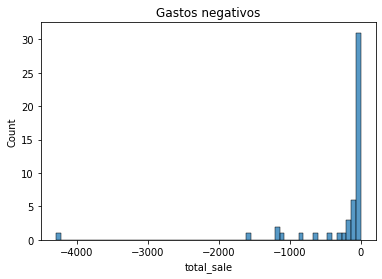

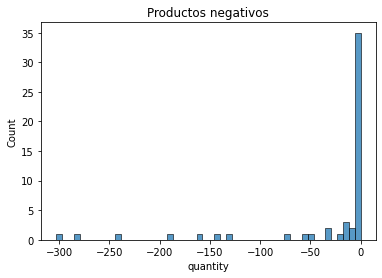

In [17]:
# Usuarios con gastos negativos o menores a cero
sns.histplot(data=gp_1[gp_1['total_sale']<=0], x='total_sale')
plt.title('Gastos negativos')
plt.show()

sns.histplot(data=gp_1[gp_1['quantity']<=0], x='quantity')
plt.title('Productos negativos')
plt.show()

### PRODUCTOS
Aquí visualizo sobre los productos, primero para saber cuáles son los más vendidos, gracias a la cantidad con la que los usuarios realizan las compras.

En segundo muestro cuáles son los productos con más altos valores(solamente de los productos más vendidos), que podrían generar más ganancias con menor cantidad. Usando el precio unitario máximo de cada producto.

En tercer lugar se muestran en tabla los productos con más altos valores.

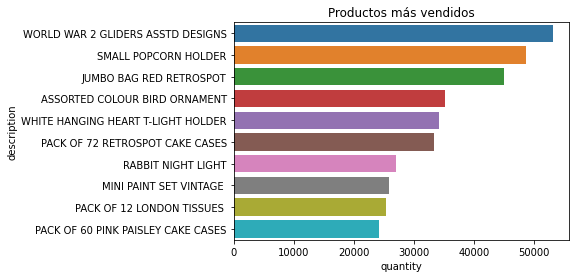

In [18]:
# Productos más comprados
gp_code = df.groupby('stock_code').agg({'description': lambda x:(x.unique().tolist()[0]), 'quantity':'sum', 'unit_price':'max'}).sort_values('quantity', ascending=False).head(10)
sns.barplot(data=gp_code, x='quantity', y='description')
plt.title('Productos más vendidos')
plt.show()
# pivot=pd.pivot_table(data=df, columns='month', index='stock_code', values='total_sale', aggfunc='sum').fillna(0)

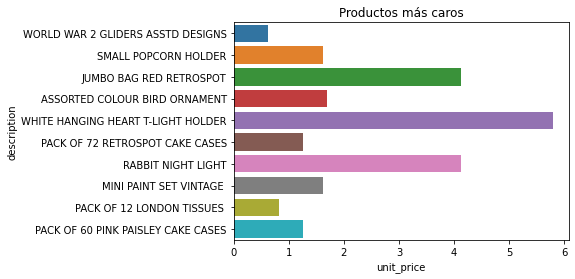

In [19]:
# Productos más vendidos y más caros
#gp_code2 = df.groupby('stock_code').agg({'description': lambda x:(x.unique().tolist()[0]), 'unit_price':'max'}).sort_values('unit_price', ascending=False).head(10)
sns.barplot(data=gp_code, x='unit_price', y='description')
plt.title('Productos más caros')
plt.show()

In [20]:
# Productos más caros
df.groupby('stock_code').agg({'description': lambda x:(x.unique().tolist()[0]), 'unit_price':'max'}).sort_values('unit_price', ascending=False).head(10)

,description,unit_price
stock_code,,
M,Manual,38970.00
POST,POSTAGE,8142.75
D,Discount,1867.86
DOT,DOTCOM POSTAGE,1599.26
CRUK,CRUK Commission,1100.44
22502,PICNIC BASKET WICKER SMALL,649.50
22655,VINTAGE RED KITCHEN CABINET,295.00
22656,VINTAGE BLUE KITCHEN CABINET,295.00
22826,LOVE SEAT ANTIQUE WHITE METAL,195.00


### REGIÓN
Después de haber visto cuáles son las compras aproximadas de los usuarios y los productos que más pueden generar ganancias, ahora se observan brevemente las ganancias que se generan por región.

Primero, las regiones que más productos han vendido. Esto, usando la columna `quantity`.

En segundo, los países con más clientes únicos, estos países pueden ser de interés para generar más ganancia, e inclusive promover más las ventas en los países con menos clientes.

En tercero, las ventas por región. Las primeras 6 regiones tienen el mismo orden, después hay diferencias, quiere decir que compran distinta cantidad de productos y de distintos valores.

Se observa que UK es el país con mas clientes y productos vendidos. El resto de países con más clientes no necesariamente compran más productos.

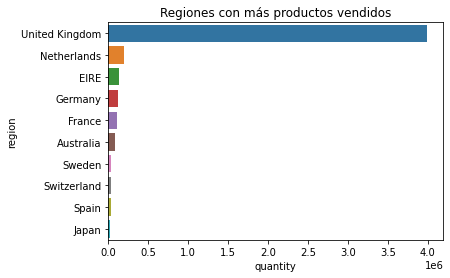

In [21]:
# Productos vendidos por región
region_df = df.groupby('region', as_index=False)
gp_2 = region_df.agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(10)
sns.barplot(data=gp_2, y='region', x='quantity')
plt.title('Regiones con más productos vendidos')
plt.show()

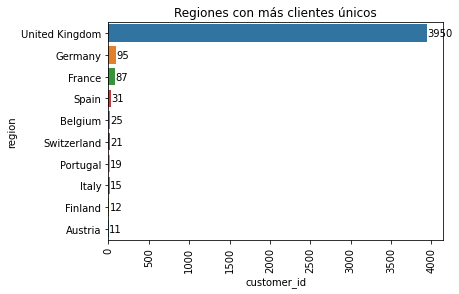

In [22]:
# Regiones con más clientes
gp_3 = region_df.agg({'customer_id':pd.Series.nunique}).sort_values('customer_id', ascending=False).head(10)

ax = sns.barplot(data=gp_3, x='customer_id', y='region')
ax.bar_label(ax.containers[0])
plt.title('Regiones con más clientes únicos')
plt.xticks(rotation=90)
plt.show()

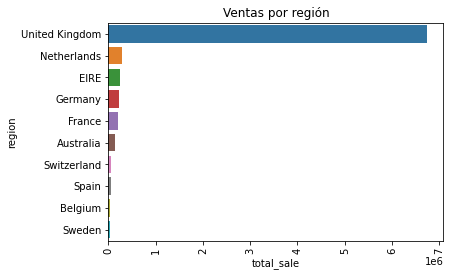

In [23]:
# Ventas por región
sns.barplot(data=region_df.agg({'total_sale':'sum'}).sort_values('total_sale', ascending=False).head(10)  , x='total_sale', y='region')
plt.title('Ventas por región')
plt.xticks(rotation=90)
plt.show()

### VENTAS MENSUALES
En este caso realizo la observación de las ventas mensuales en total y se observa que la mayor parte de las ventas se genera en el mes de noviembre (11).

Al observar las ventas por región, claramente UK está sobre todas las demás y se pueden observar que hay regiones con mayores ventas en los meses 7 y 10 (julio y octubre)

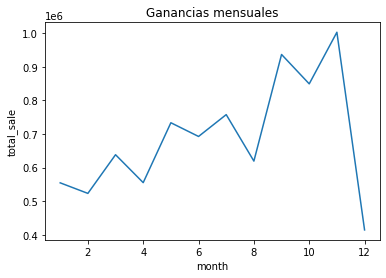

In [24]:
# Ventas en los meses registrados
gp_4 = df.groupby('month', as_index=False).agg({'total_sale':'sum'})
sns.lineplot(data=gp_4, x='month', y='total_sale')
plt.title('Ganancias mensuales')
plt.show()

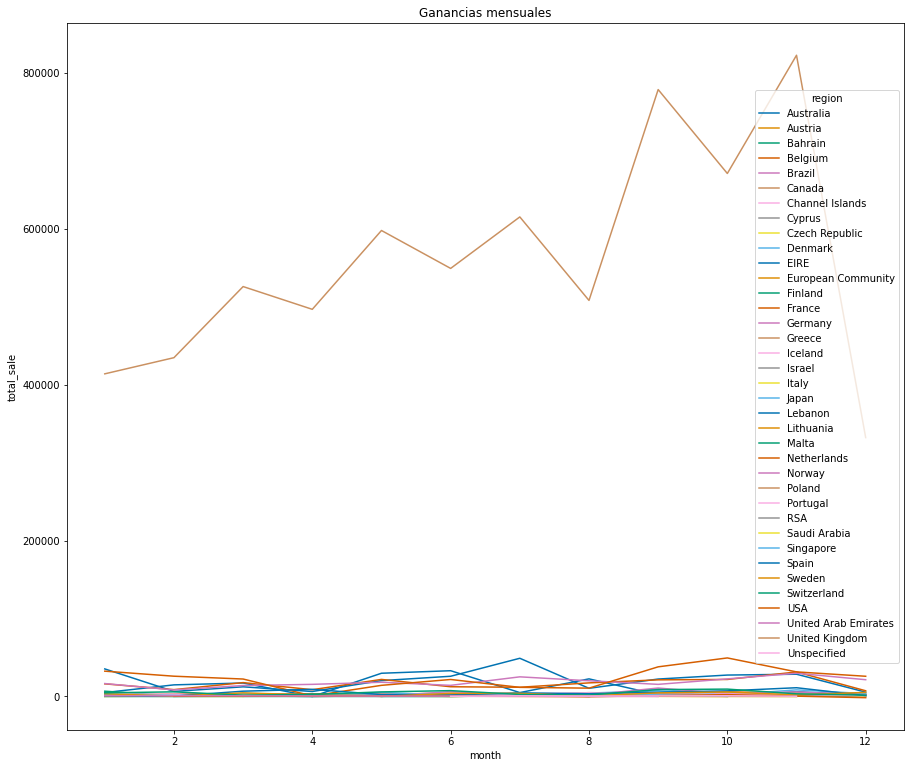

In [25]:
gp_5 = df.groupby(['region', 'month'], as_index=False).agg({'total_sale':'sum'})
plt.figure(figsize=(15,13))
sns.lineplot(data=gp_5, x='month', y='total_sale', hue='region', palette='colorblind')
plt.title('Ganancias mensuales')
plt.show()

## <a style="color:red">DESCARTADOS</a>
- Distribución por usuario
- distribución por región de ventas totales
- Distribución por región y por usuario para las ventasa totales
- Productos más vendidos usando quantity
- Fechas con mayores ventas

## <a style="color:red">OTRO EDA DESCARTADO</a>
- USERS 11FF33
    - Pedidos por usuario
    - Productos por pedido
    - Productos por usuario
- DATES
    - Meses con más ventas
    - Ventas por regiones y fechas
    - Productos más vendidos en el tiempo
- SALES
    - Productos más vendidos
    - Regiones con más ventas